In [ ]:
## ME analysis (microenvironment analysis)

In [1]:
import numpy as np

In [2]:
import pandas
from matplotlib import pyplot as plt

In [ ]:
import scanpy

In [ ]:
# Let's make the cell-by-neighbor matrix for the entire tissue (Slide1_Region1)

In [3]:
distances_matrix = np.load('./whole_tissue_distances_mtx_new_imputed.npy')

In [4]:
distances_matrix

array([[   0.        ,  899.75518219,  982.80890929, ..., 1094.90819031,
        1094.93024045, 1095.61701721],
       [   0.        ,  899.75518219,  982.80890929, ..., 1094.90819031,
        1094.93024045, 1095.61701721],
       [   8.19046701,    8.33202855,   26.37482535, ...,  110.90669372,
         110.92310255,  111.26546103],
       ...,
       [ 181.02815819,  277.00539763,  541.76249655, ...,  600.62223067,
         600.87648816,  600.88809416],
       [ 301.73302567,  444.17027125,  447.6898322 , ...,  591.42013899,
         591.75156071,  591.81594319],
       [ 181.02815819,  376.5830585 ,  670.09910891, ...,  776.8311478 ,
         777.49549358,  777.50928574]])

In [6]:
distances_mask = np.load('./whole_tissue_distances_mask_new_imputed.npy')

In [7]:
neighbor_graph = np.load('./whole_tissue_neighbor_graph_new_imputed.npy')

In [8]:
distances_mask

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
distances_mask.shape

(61172, 100)

In [11]:
distances_mask[0, :]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [12]:
distances_mask[1, :]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [24]:
neighbor_graph

array([[    1,  1320,  6737, ...,  9898, 10630, 11004],
       [    1,  1320,  6737, ...,  9898, 10630, 11004],
       [    8,     3,    36, ...,   152,    22,   318],
       ...,
       [61171, 61168, 61162, ..., 58546, 61126, 59497],
       [61167, 61158, 61160, ..., 60790, 60783, 60793],
       [61169, 61168, 61162, ..., 58266, 58220, 59392]])

In [22]:
masked_matrix = neighbor_graph* distances_mask # here, if distances_mask = 0, the entry in masked_matrix = 0

In [23]:
# These are the neighbor indices (aka the row indices of the cells, 
# I want to use the cell labels of these neighbor indices
masked_matrix

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 8,  3, 36, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [27]:
test_masked_matrix = masked_matrix.astype(float)


In [28]:
test_masked_matrix[test_masked_matrix == 0] = np.nan

In [40]:
test_masked_matrix

array([[ 1., nan, nan, ..., nan, nan, nan],
       [ 1., nan, nan, ..., nan, nan, nan],
       [ 8.,  3., 36., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [38]:
test_masked_matrix[1000, :]

array([1042., 1006.,  923., 1103., 1188.,  828., 1129.,  911., 1228.,
       1074.,  981., 1269., 1210.,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan])

In [41]:
distances_matrix[1000, :]

array([  6.21979592,   8.42461153,  14.64939006,  16.48097537,
        19.17327302,  21.55228882,  22.38925218,  24.02640564,
        25.18649215,  25.45711016,  26.6790684 ,  27.31620518,
        28.39823002,  30.49876275,  31.51668855,  31.84966559,
        32.06994307,  32.29638143,  38.27341979,  38.37474893,
        40.08749823,  40.11265433,  42.37109791,  45.53250473,
        48.01315918,  48.55241796,  49.63742971,  50.38710254,
        50.58835798,  51.52816323,  52.02532766,  52.82662624,
        53.48882914,  54.81512324,  55.39811902,  56.48277185,
        57.34247697,  57.95947593,  58.0330015 ,  59.47772043,
        59.91996812,  62.30356842,  62.50091634,  63.45806016,
        65.98800172,  66.59169396,  67.53506107,  70.06582989,
        70.18828689,  70.27507817,  71.08850041,  72.6167146 ,
        73.30557912,  73.40745921,  73.52528927,  74.29684478,
        75.44481533,  76.54877883,  77.13012866,  77.73798533,
        79.05527659,  79.46398807,  81.05268904,  82.17

In [43]:
!pwd

/Users/jacquelinechou/Code/scanpy_env


In [49]:
import pandas as pd

In [51]:
# Oddly, there are two entries at (0,0) centroid_x, centroid_y that have no transcripts allocated to it
# But it's in Wesley's dataframe, which is super annoying... So everything I do here would need to be repeated w/ good labels

ordered_sc_data = pd.read_parquet('./ordered_sc_data_wesley_labels.parquet')

In [52]:
ordered_sc_data

,centroid_x,centroid_y,cell_area,HGF,CXCR4,CAVIN1,HIF1A,MEDAG,PTGDS,PECAM1,...,UPK3B,TNFRSF13B,TAT,GPX2,PPY,KLK11,RETN,C20orf85,LY6D,cell_labels_wes
2565,0.000000,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
8125,0.000000,0.000000,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
42013,101.315068,3239.493151,73.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
42009,103.129630,3231.361111,108.0,0,0,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.0
41966,103.746667,3163.486667,150.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,3891.369863,4202.205479,73.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0
55073,3988.473684,1838.631579,38.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
52425,4053.686275,1569.411765,51.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0
49800,4182.720930,4280.674419,43.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0


In [54]:
cell_labels = np.array(ordered_sc_data.loc[:, 'cell_labels_wes'])

In [55]:
cell_labels

array([3., 1., 9., ..., 8., 6., 6.])

In [56]:
# Let's remove the first two rows in the df b/c they have no transcripts at all...
cell_labels = cell_labels[2:]

In [57]:
cell_labels.shape # 61170 cells left

(61170,)

In [64]:
masked_matrix # Keep in mind that the first 2 rows are not real, I'll just toss it out

# So, I need to be able to pick out the cell-type each neighbor is, but the zeros mean that it's not within the threshold range
# So I can change the zero-th index entry to a non-sensical value, like a string, so I know it doesn't correspond to anything. 

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 8,  3, 36, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [104]:
masked_matrix[2, 0:10]

array([ 8,  3, 36, 19,  0,  0,  0,  0,  0,  0])

In [69]:
ordered_sc_data.columns[-1]

'cell_labels_wes'

In [72]:
ordered_cell_labels = np.array(ordered_sc_data.loc[:, 'cell_labels_wes'])

In [101]:
ordered_cell_labels[0:10]

array([nan, nan,  9.,  3.,  9.,  3.,  9.,  9.,  9.,  9.])

In [105]:
ordered_cell_labels[19]

9.0

In [75]:
ordered_cell_labels[0] = np.nan

In [77]:
ordered_cell_labels[1] = np.nan

In [79]:
ordered_cell_labels.shape

(61172,)

In [80]:
cell_by_neighbors_cell_type_array = ordered_cell_labels[masked_matrix]

In [83]:
cell_by_neighbors_cell_type_array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 9.,  3.,  3., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [103]:
cell_by_neighbors_cell_type_array[2]

array([ 9.,  3.,  3.,  9., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [108]:
cell_by_neighbors_cell_type_array[60000:60040, 0:20]

array([[ 6.,  6.,  2.,  3.,  6.,  1.,  4.,  6.,  6.,  2.,  3.,  3.,  3.,
         6.,  1.,  3.,  6.,  6.,  6.,  1.],
       [ 6.,  6.,  3.,  6.,  6.,  6.,  6.,  9.,  9.,  6.,  6.,  6.,  3.,
         3.,  9.,  6.,  6.,  6., nan, nan],
       [ 6.,  6.,  6.,  6.,  9.,  6.,  9.,  6.,  9.,  6.,  6.,  6.,  9.,
         6., nan, nan, nan, nan, nan, nan],
       [ 6.,  1.,  6.,  9.,  2.,  1.,  1.,  1.,  6.,  1.,  3.,  6.,  9.,
         9.,  1.,  1.,  9., nan, nan, nan],
       [ 9.,  9.,  6.,  9.,  9.,  9.,  5.,  3.,  0.,  9., 11.,  9.,  9.,
         0.,  1., 10., 11.,  3.,  9.,  9.],
       [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  6.,  3.,  1.,  1.,
         3.,  1.,  8.,  1.,  0.,  9.,  2.],
       [ 9.,  6.,  6.,  7.,  9.,  9.,  9.,  9.,  3.,  9.,  6.,  9.,  9.,
         6., nan, nan, nan, nan, nan, nan],
       [ 6.,  9.,  6.,  3.,  6.,  9.,  6.,  9.,  9.,  9.,  9.,  6.,  9.,
         9.,  6.,  9., nan, nan, nan, nan],
       [ 9.,  9.,  6.,  6., 10.,  9.,  9.,  9.,  6.,  9.,  6.,  

In [109]:
# Now I can drop the first two rows b/c they don't correspond to a cell
cell_by_neighbors_cell_type_array

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [ 9.,  3.,  3., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [110]:
cell_by_neighbors_cell_type_array[2:]

array([[ 9.,  3.,  3., ..., nan, nan, nan],
       [ 9.,  9.,  9., ..., nan, nan, nan],
       [ 9.,  9.,  3., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [114]:
filtered_cell_by_neighbors_cell_type_array = cell_by_neighbors_cell_type_array[2:]

In [111]:
# Per cell, let's get the number of cells per cell-type
from collections import Counter

In [118]:
array_without_nan = np.nan_to_num(filtered_cell_by_neighbors_cell_type_array, nan=616)


In [119]:
array_without_nan

array([[  9.,   3.,   3., ..., 616., 616., 616.],
       [  9.,   9.,   9., ..., 616., 616., 616.],
       [  9.,   9.,   3., ..., 616., 616., 616.],
       ...,
       [616., 616., 616., ..., 616., 616., 616.],
       [616., 616., 616., ..., 616., 616., 616.],
       [616., 616., 616., ..., 616., 616., 616.]])

In [123]:
celltype_counters = [Counter(row) for row in array_without_nan]

In [124]:
celltype_counters

[Counter({9.0: 2, 3.0: 2, 616.0: 96}),
 Counter({9.0: 4, 3.0: 1, 616.0: 95}),
 Counter({9.0: 6, 3.0: 1, 616.0: 93}),
 Counter({9.0: 8, 3.0: 1, 616.0: 91}),
 Counter({9.0: 6, 3.0: 3, 616.0: 91}),
 Counter({9.0: 1, 3.0: 5, 616.0: 94}),
 Counter({9.0: 4, 3.0: 3, 616.0: 93}),
 Counter({9.0: 2, 3.0: 2, 616.0: 96}),
 Counter({9.0: 3, 3.0: 4, 616.0: 93}),
 Counter({9.0: 10, 3.0: 3, 616.0: 87}),
 Counter({9.0: 4, 3.0: 2, 616.0: 94}),
 Counter({9.0: 10, 3.0: 2, 616.0: 88}),
 Counter({3.0: 4, 9.0: 1, 616.0: 95}),
 Counter({3.0: 6, 9.0: 4, 616.0: 90}),
 Counter({3.0: 6, 9.0: 2, 616.0: 92}),
 Counter({9.0: 9, 3.0: 4, 616.0: 87}),
 Counter({3.0: 8, 9.0: 1, 616.0: 91}),
 Counter({9.0: 6, 3.0: 4, 616.0: 90}),
 Counter({9.0: 5, 3.0: 5, 616.0: 90}),
 Counter({9.0: 6, 3.0: 2, 616.0: 92}),
 Counter({9.0: 10, 3.0: 4, 616.0: 86}),
 Counter({3.0: 5, 9.0: 9, 616.0: 86}),
 Counter({3.0: 4, 9.0: 1, 616.0: 95}),
 Counter({9.0: 2, 3.0: 4, 616.0: 94}),
 Counter({3.0: 5, 9.0: 4, 616.0: 91}),
 Counter({9.0: 7, 3.0:

In [127]:
value_range = np.arange(12)

TypeError: arange() got an unexpected keyword argument 'type'

In [137]:
value_range = np.array(value_range, dtype = 'int64')

In [141]:
value_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [142]:
array_without_nan.astype('int64')

array([[  9,   3,   3, ..., 616, 616, 616],
       [  9,   9,   9, ..., 616, 616, 616],
       [  9,   9,   3, ..., 616, 616, 616],
       ...,
       [616, 616, 616, ..., 616, 616, 616],
       [616, 616, 616, ..., 616, 616, 616],
       [616, 616, 616, ..., 616, 616, 616]])

In [144]:
array_without_nan

array([[  9.,   3.,   3., ..., 616., 616., 616.],
       [  9.,   9.,   9., ..., 616., 616., 616.],
       [  9.,   9.,   3., ..., 616., 616., 616.],
       ...,
       [616., 616., 616., ..., 616., 616., 616.],
       [616., 616., 616., ..., 616., 616., 616.],
       [616., 616., 616., ..., 616., 616., 616.]])

In [145]:
# Count occurrences of each value in each row
occurrences = np.apply_along_axis(lambda row: np.bincount(row, minlength=len(value_range)), axis=1, arr=array_without_nan.astype('int64'))

In [147]:
occurrences.shape

(61170, 617)

In [149]:
occurrences[:, 0:11]

array([[0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 6, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [152]:
pd.DataFrame(occurrences[:, 0:11])

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,2,0,0,0,0,0,2,0
1,0,0,0,1,0,0,0,0,0,4,0
2,0,0,0,1,0,0,0,0,0,6,0
3,0,0,0,1,0,0,0,0,0,8,0
4,0,0,0,3,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...
61165,0,0,0,0,0,0,0,0,0,0,0
61166,0,0,0,0,0,0,0,0,0,0,0
61167,0,0,0,0,0,0,0,0,0,0,0
61168,0,0,0,0,0,0,0,0,0,0,0


(array([106.,   0., 110.,   0.,   0.,  90.,   0.,   0.,  79.,   0.,   0.,
         51.,   0.,   0.,  37.,   0.,   0.,  35.,   0.,   0.,  25.,   0.,
         39.,   0.,   0.,  19.,   0.,   0.,  13.,   0.,   0.,  15.,   0.,
          0.,   4.,   0.,   0.,   3.,   0.,   1.]),
 array([51.  , 51.35, 51.7 , 52.05, 52.4 , 52.75, 53.1 , 53.45, 53.8 ,
        54.15, 54.5 , 54.85, 55.2 , 55.55, 55.9 , 56.25, 56.6 , 56.95,
        57.3 , 57.65, 58.  , 58.35, 58.7 , 59.05, 59.4 , 59.75, 60.1 ,
        60.45, 60.8 , 61.15, 61.5 , 61.85, 62.2 , 62.55, 62.9 , 63.25,
        63.6 , 63.95, 64.3 , 64.65, 65.  ]),
 <BarContainer object of 40 artists>)

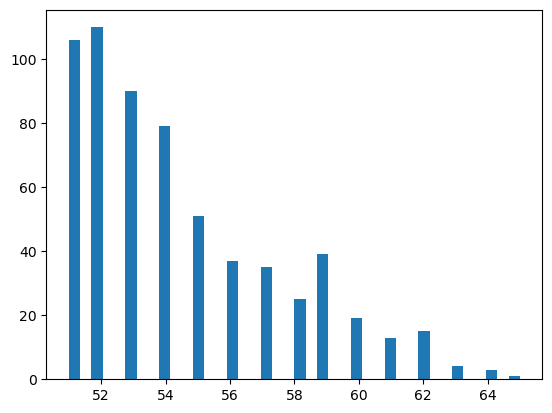

In [161]:
plt.hist(occurrences[:, 0:11].sum(axis = 1)[occurrences[:, 0:11].sum(axis=1) > 50], bins = 40)

In [ ]:
# Interesting! This is saying that there are cells that have 50-60 cells as neighbors... So within 30 microns of a cell

In [163]:
occurrences[:, 0:11].shape

(61170, 11)

In [165]:
cell_by_neighbors_tabulated_array = occurrences[:, 0:11]

In [166]:
cell_by_neighbors_tabulated_array

array([[0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 4, 0],
       [0, 0, 0, ..., 0, 6, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [167]:
# As per the AKI paper, let's center this matrix to mean = 0

# Calculate the mean of the entire matrix
matrix_mean = np.mean(cell_by_neighbors_tabulated_array)

# Subtract the mean from the matrix
centered_matrix = cell_by_neighbors_tabulated_array - matrix_mean

In [170]:
centered_matrix

array([[-1.46916195, -1.46916195, -1.46916195, ..., -1.46916195,
         0.53083805, -1.46916195],
       [-1.46916195, -1.46916195, -1.46916195, ..., -1.46916195,
         2.53083805, -1.46916195],
       [-1.46916195, -1.46916195, -1.46916195, ..., -1.46916195,
         4.53083805, -1.46916195],
       ...,
       [-1.46916195, -1.46916195, -1.46916195, ..., -1.46916195,
        -1.46916195, -1.46916195],
       [-1.46916195, -1.46916195, -1.46916195, ..., -1.46916195,
        -1.46916195, -1.46916195],
       [-1.46916195, -1.46916195, -1.46916195, ..., -1.46916195,
        -1.46916195, -1.46916195]])

In [172]:
np.save('./cell_by_neighbors_tabulated_array_for_me_analysis.npy', cell_by_neighbors_tabulated_array)

In [173]:
np.save('./centered_cell_by_neighbors_matrix.npy', centered_matrix)

In [ ]:
import anndata as ad